<a href="https://colab.research.google.com/github/hetalgada15/Machine-Learning-Projects-Grad-/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Fraud Detection in Financial Transactions

## Abstract

#### This project focuses on developing a machine learning model to accurately detect fraudulent financial transactions. By analyzing various features such as transaction type, amount, customer balances, etc., the model aims to identify fraudulent behavior and reduce financial losses. The project will explore different machine learning algorithms, evaluate their performance, and provide insights for improving fraud detection techniques.

## Data set

### Kaggle Dataset Link
https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

## Required Libraries

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

## Kaggle Dataset Access

In [ ]:
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'

od.download(download_url)
#od.set_kaggle_username('heena2210000')
#od.set_kaggle_key('6cb6472376e91d7e6b4f8d21e9b21c61')
#od.set_kaggle_username('hegada')
#od.set_kaggle_key('1d8bad775bf57496eec569b5361e3379')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hegada
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection


100%|██████████| 178M/178M [00:09<00:00, 19.8MB/s]


## Clear Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')


## Performing Exploratory Data Analysis

In [ ]:
data= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Getting the summary of the dataset ( Numerical statistics )
summarize_data = data.describe()
summarize_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
summarize_data = data.describe()
summarize_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
#convert the data type of the "isFraud" column in a Pandas DataFrame from a numerical type (e.g., int or float) to an object type.
data['isFraud'] = data['isFraud'].astype('object')

In [ ]:
#Getting the summary of the dataset ( Categorical statistics )
summary = data.describe(include = 'object')
summary

,type,nameOrig,nameDest,isFraud
count,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2
top,CASH_OUT,C1902386530,C1286084959,0
freq,2237500,3,113,6354407


### Check for Missing Values

In [ ]:
#Checking for any missing Data
data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


### Observation :
There are no null values

In [ ]:
#Creating new features

# create a copy of the original dataframe to avoid modifying the original data
processed_data = data.copy()

# convert the transaction type to a categorical variable
processed_data['type_category'] = pd.factorize(processed_data['type'])[0]

# extract the numerical part of the nameDest column and convert to integer
processed_data['nameDest_num'] = processed_data['nameDest'].str.extract(r'(\d+$)').astype(int)

# extract the numerical part of the nameOrig column and convert to integer
processed_data['nameOrig_num'] = processed_data['nameOrig'].str.extract(r'(\d+$)').astype(int)

# apply log transformation to the amount column and add 1 to avoid log(0)
processed_data['amount_log'] = np.log(processed_data['amount'] + 1)

# show the first 100 rows of the processed data
processed_data.head(100)

data = processed_data.copy()
data.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_category,nameDest_num,nameOrig_num,amount_log
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1979787155,1231006815,9.19
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,2044282225,1666544295,7.53
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,1,553264065,1305486145,5.20
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,2,38997010,840083671,5.20
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1230701703,2048537720,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.00,0.00,C1359044626,738531.50,16518.36,0,0,1,1359044626,835773569,13.47
96,1,TRANSFER,581294.26,C843299092,0.00,0.00,C1590550415,5195482.15,19169204.93,0,0,1,1590550415,843299092,13.27
97,1,TRANSFER,11996.58,C605982374,0.00,0.00,C1225616405,40255.00,0.00,0,0,1,1225616405,605982374,9.39
98,1,PAYMENT,2875.10,C1412322831,15443.00,12567.90,M1651262695,0.00,0.00,0,0,0,1651262695,1412322831,7.96


## Creating Visualizations

### Countplot

Percentage of Fraudulent Transactions from Total Transactions: 0.13%


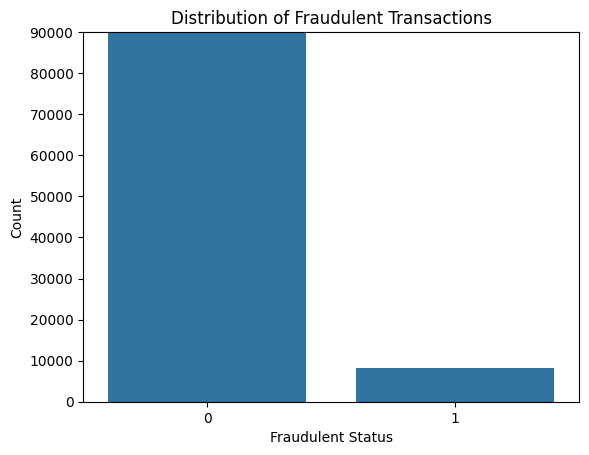

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of fraudulent vs non-fraudulent transactions
sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent Status')
plt.ylabel('Count')

# Set the y-axis limit
plt.ylim(0, 90000)

# Calculate the percentage of fraudulent transactions
fraud_count = sum(data['isFraud'])
total_count = len(data)
fraud_percentage = fraud_count / total_count * 100

# Print the percentage of fraudulent transactions
print(f"Percentage of Fraudulent Transactions from Total Transactions: {fraud_percentage:.2f}%")

# Display the plot
plt.show()

In [ ]:
Total_non_fraud_count = len(data[data.isFraud == 0])
Total_fraud_count = len(data[data.isFraud == 1])

print("Number of Legit transactions from Total Transactions: ", Total_non_fraud_count)
print("Number of Fraud transactions from Total Transactions: ", Total_fraud_count)

Number of Legit transactions from Total Transactions:  6354407
Number of Fraud transactions from Total Transactions:  8213


### Observation :
There are 8213 fraud transactions, which sums up to 13% of total transactions

### Histogram and Box Plot

t-statistic: -95.76
p-value: 0.00e+00


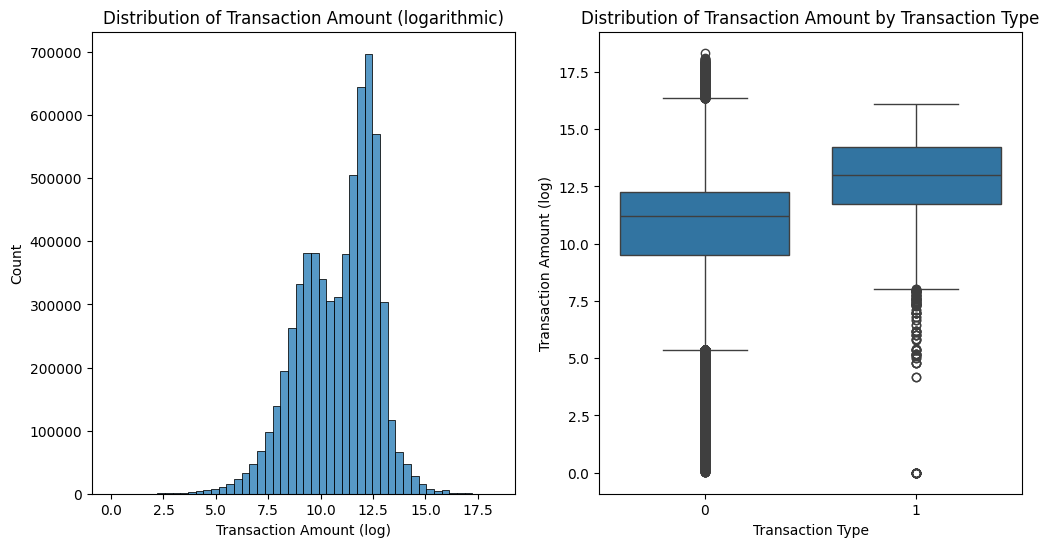

In [ ]:
import seaborn as sns
from scipy.stats import ttest_ind

# create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot histogram of transaction amount
sns.histplot(data=data, x='amount_log', bins=50, ax=ax[0])
ax[0].set(xlabel='Transaction Amount (log)', ylabel='Count', title='Distribution of Transaction Amount (logarithmic)')

# plot boxplot of transaction amount by fraud status
sns.boxplot(data=data, x='isFraud', y='amount_log', ax=ax[1])
ax[1].set(xlabel='Transaction Type', ylabel='Transaction Amount (log)', title='Distribution of Transaction Amount by Transaction Type')

# calculate t-statistic and p-value
non_fraud = data.loc[data['isFraud'] == 0, 'amount_log']
fraud = data.loc[data['isFraud'] == 1, 'amount_log']
t_stat, p_val = ttest_ind(non_fraud, fraud, equal_var=False)

# print t-statistic and p-value
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2e}")

plt.show()


### Observation:
T-stat - measures the difference between the mean of transactions of two groups: fraud and non-fraud transactions
The large negative t-statistic and very small p-value suggest that this difference is very significant.

### Scatterplot

# create a scatterplot
sns.scatterplot(x='nameDest_num', y='nameOrig_num', hue='isFraud', data=data)

# set the title and axis labels
plt.title('Transaction Origin vs Destination')
plt.xlabel('Destination Account Number')
plt.ylabel('Origin Account Number')

# show the plot
plt.show()

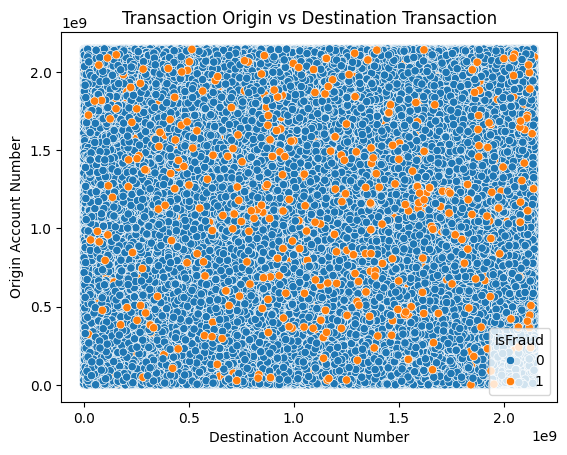

In [ ]:
# create a scatterplot
sns.scatterplot(x='nameDest_num', y='nameOrig_num', hue='isFraud', data=data)

# set the title and axis labels
plt.title('Transaction Origin vs Destination Transaction')
plt.xlabel('Destination Account Number')
plt.ylabel('Origin Account Number')

# show the plot
plt.show()

### Bar Plot

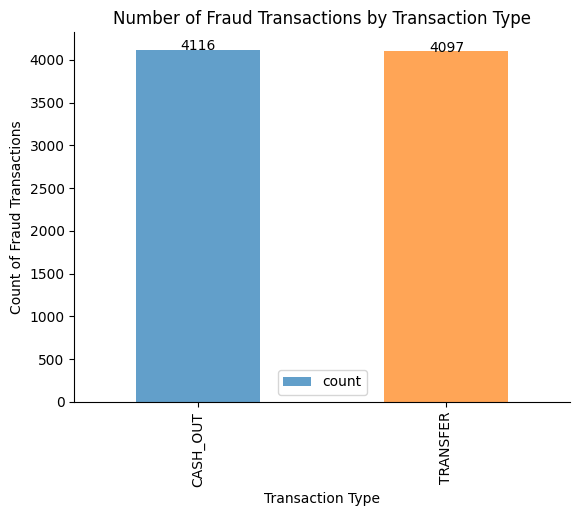

In [ ]:
# define the colors for each column
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# count the number of fraud transactions by transaction type
fraud_occurrence = data[data['isFraud'] == 1].groupby('type')['isFraud'].count().reset_index(name='count')

# create a bar plot
ax = fraud_occurrence.plot(x='type', y='count', kind='bar', color=colors, alpha=0.7)

# set the title and axis labels
ax.set_title('Number of Fraud Transactions by Transaction Type')
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Count of Fraud Transactions')

# add data labels to the bars
for i, count in enumerate(fraud_occurrence['count']):
    ax.text(i, count+0.5, str(count), ha='center', fontsize=10)

# remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show the plot
plt.show()


### Observation:
Out of 8213 fraud transactions, 4116 were made through cash_out transactions and 4097 were made through transfer transactions

### Histogram for selected features

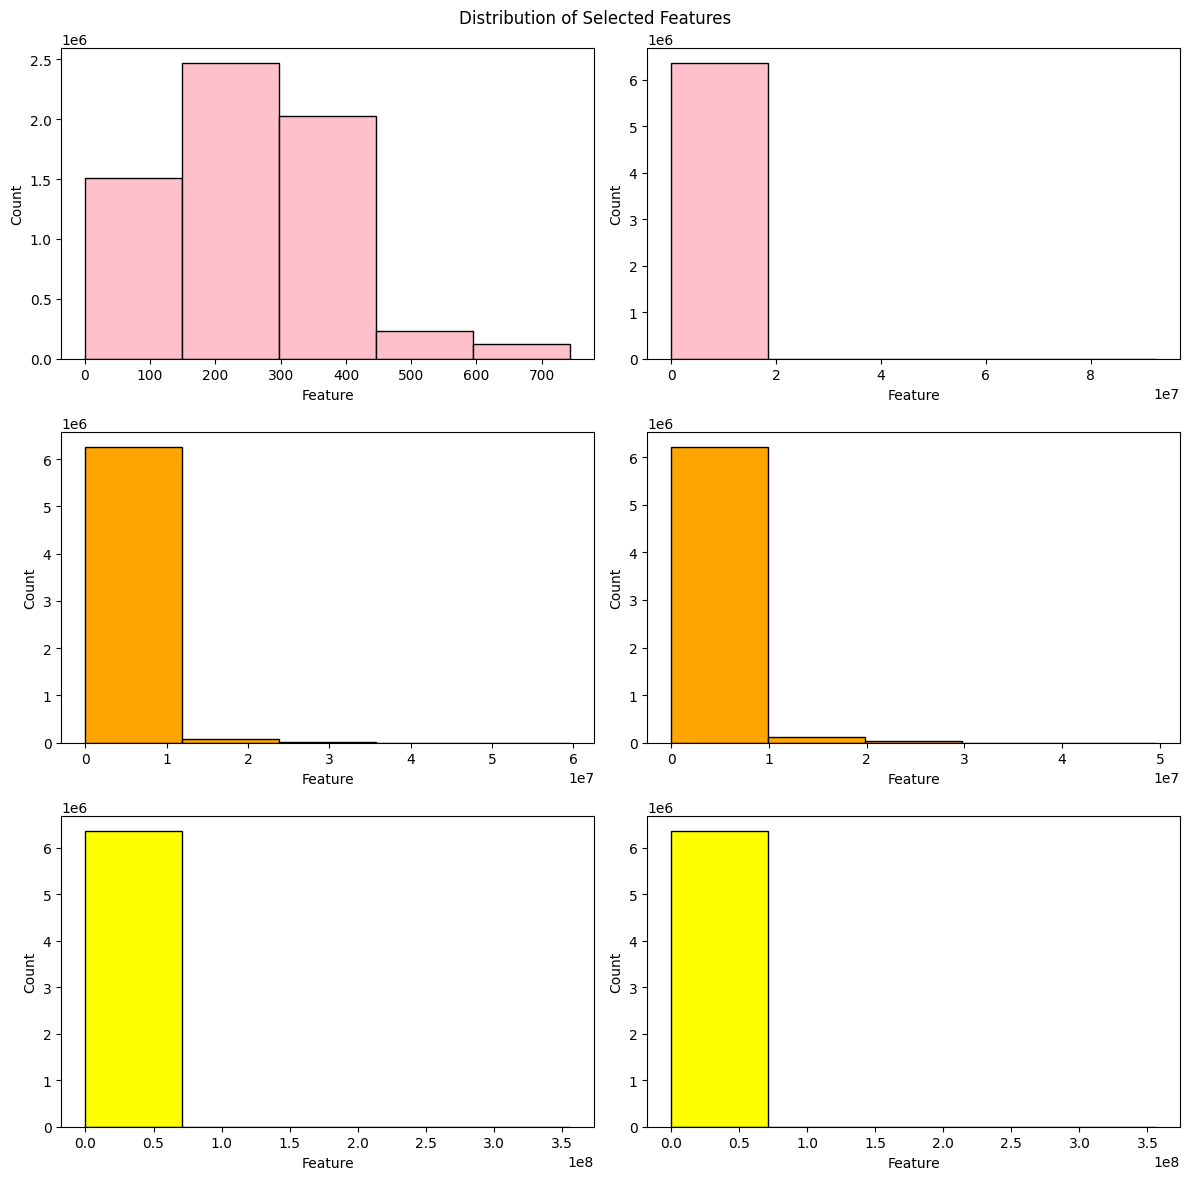

In [ ]:
# Selected features
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Set the figure size and colors
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
colors = ['pink', 'pink', 'orange', 'orange', 'yellow', 'yellow', 'green', 'green', 'blue', 'blue', 'purple', 'purple']

# Plot each feature as a histogram
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    axes[row][col].hist(data[feature], bins=5, color=colors[i], edgecolor='black')
    axes[row][col].set_xlabel('Feature')
    axes[row][col].set_ylabel('Count')

# Set the title and layout
fig.suptitle('Distribution of Selected Features')
fig.tight_layout()

# Show the plot
plt.show()


### Observation:
Identified Outliers

### Removing Outliers using IQR Method

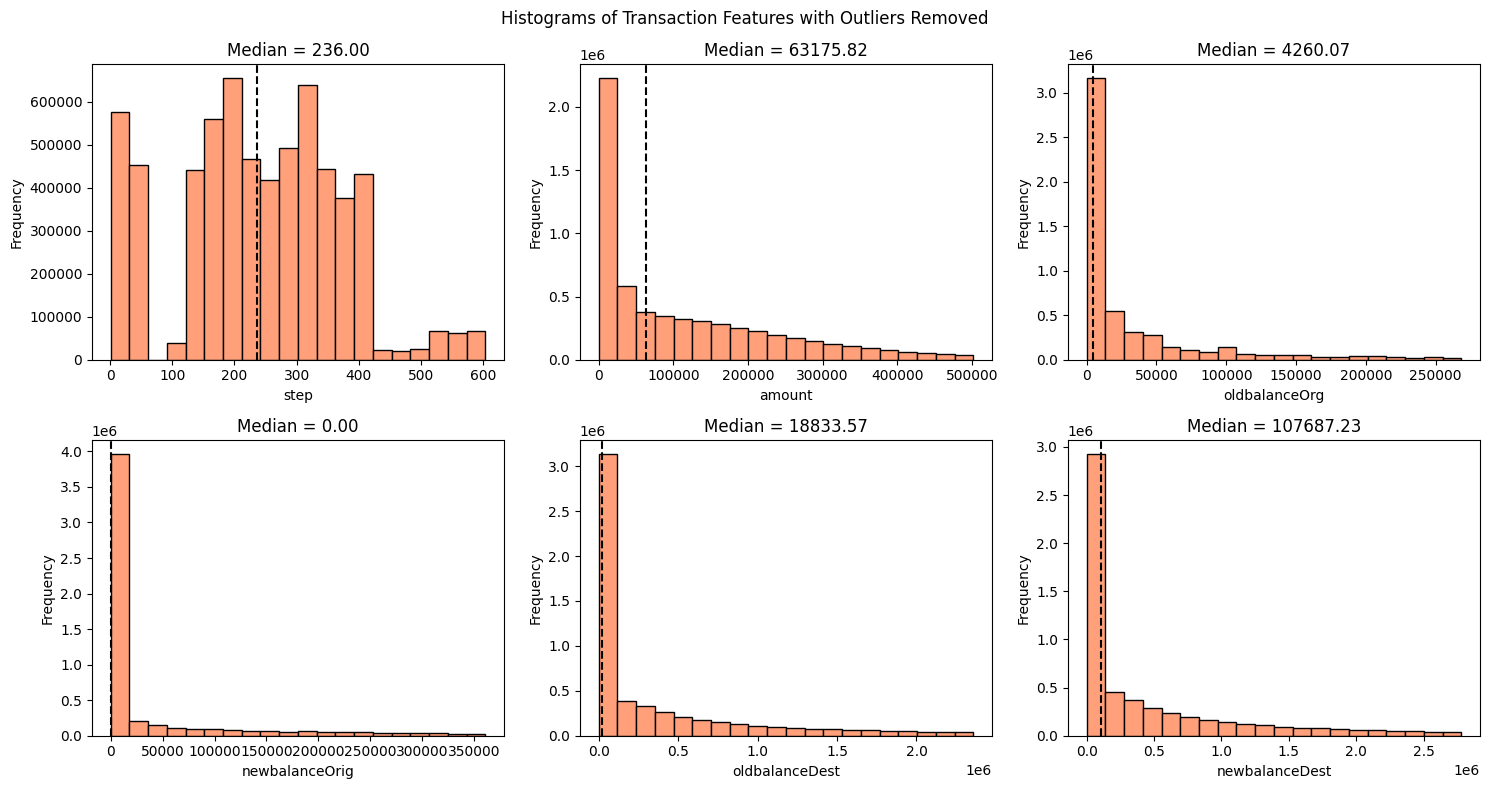

In [ ]:
# Define a function to remove outliers based on IQR
def outliers_removal_by_iqr(data, feature):
    q1 = np.percentile(data[feature], 25)
    q3 = np.percentile(data[feature], 75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

# Define a list of features to analyze
features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Loop through the features and plot histograms after removing outliers
for i, feature in enumerate(features):
    # Remove outliers from the data
    no_outliers_data = outliers_removal_by_iqr(data, feature)

    # Plot the histogram on the appropriate subplot
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.hist(no_outliers_data[feature], bins=20, color='#ffa07a', edgecolor='black')

    # Set axis labels
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

    # Add a vertical line for the median
    median = no_outliers_data[feature].median()
    ax.axvline(median, color='black', linestyle='--')

    # Add a title with the median value
    ax.set_title('Median = {:.2f}'.format(median))

# Add a title to the figure
fig.suptitle('Histograms of Transaction Features with Outliers Removed')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# class count
target_count_0, class_count_1 = data['isFraud'].value_counts()

# Separate class
target_0 = data[data['isFraud'] == 0]
target_1 = data[data['isFraud'] == 1]
# print the shape of the class
print('Target 0:', target_0.shape)
print('Target 1:', target_1.shape)

Target 0: (6354407, 15)
Target 1: (8213, 15)


### Random Under-sampling

Number of samples in class 0 (non-fraudulent): 8213
Number of samples in class 1 (fraudulent): 8213


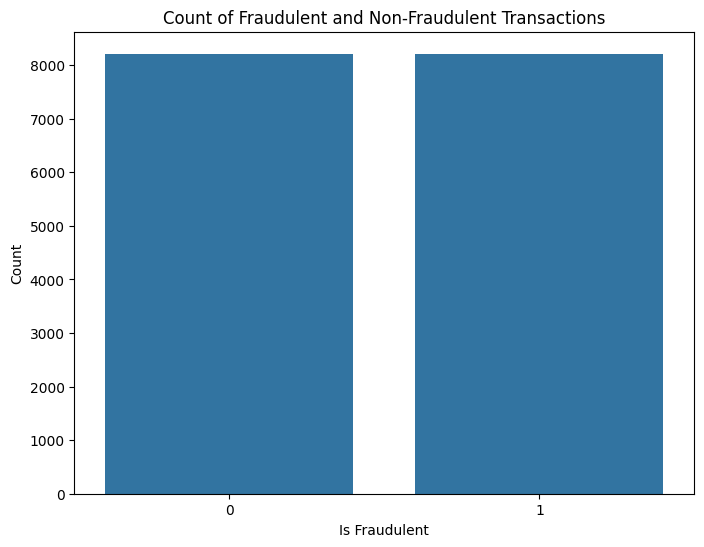

In [ ]:
#Get the count of samples in each class
target_count_0, target_count_1 = data['isFraud'].value_counts()

#Sample class 0 to match the number of samples in class 1
class_0_under = target_0.sample(target_count_1)

#Concatenate the undersampled class 0 and class 1 to balance the data
balancing_data = pd.concat([class_0_under, target_1], axis=0)

#Print the number of samples in each class
print(f'Number of samples in class 0 (non-fraudulent): {balancing_data[balancing_data["isFraud"]==0].shape[0]}')
print(f'Number of samples in class 1 (fraudulent): {balancing_data[balancing_data["isFraud"]==1].shape[0]}')

#Plot the count after undersampling
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud', data=balancing_data)
plt.title('Count of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

### Observation:
Since we have 6354407 non-fraud transactions and 8213 fraud transactions, we're balancing the count by randomly choosing 8213 non-fraud transactions

In [ ]:
balancing_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_category,nameDest_num,nameOrig_num,amount_log
1017081,47,PAYMENT,1557.81,C226280777,1805.00,247.19,M331472903,0.00,0.00,0,0,0,331472903,226280777,7.35
2995470,232,CASH_OUT,209451.77,C1007122684,0.00,0.00,C861905636,423413.14,632864.91,0,0,2,861905636,1007122684,12.25
2591720,207,TRANSFER,63828.72,C405147885,0.00,0.00,C1414883178,305018.27,368846.99,0,0,1,1414883178,405147885,11.06
5868033,403,CASH_IN,155419.03,C1935864282,5075240.29,5230659.32,C785898464,1897036.18,1741617.15,0,0,4,785898464,1935864282,11.95
5843740,402,TRANSFER,261480.76,C44462723,0.00,0.00,C777496033,3315534.30,3577015.06,0,0,1,777496033,44462723,12.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,2,776919290,786484425,12.74
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1,1881841831,1529008245,15.66
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,2,1365125890,1162922333,15.66
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,1,2080388513,1685995037,13.65


In [ ]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 1017081 to 6362619
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  object 
 10  isFlaggedFraud  16426 non-null  int64  
 11  type_category   16426 non-null  int64  
 12  nameDest_num    16426 non-null  int64  
 13  nameOrig_num    16426 non-null  int64  
 14  amount_log      16426 non-null  float64
dtypes: float64(6), int64(5), object(4)
memory usage: 2.5+ MB


In [ ]:
balancing_data.type.unique()

array(['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [ ]:
balancing_data["type"] = balancing_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [ ]:
balancing_data.type.dtype

dtype('int64')

In [ ]:
balancing_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_category', 'nameDest_num', 'nameOrig_num',
       'amount_log'],
      dtype='object')

In [ ]:
balancing_data['balance_diff'] = data.oldbalanceOrg - data.newbalanceOrig

In [ ]:
balancing_data.balance_diff.describe()

,balance_diff
count,16426.00
mean,716852.04
std,1850444.43
min,-784268.86
25%,0.00
50%,34099.10
75%,438203.40
max,10000000.00


In [ ]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 1746391 to 6362619
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  object 
 10  isFlaggedFraud  16426 non-null  int64  
 11  type_category   16426 non-null  int64  
 12  nameDest_num    16426 non-null  int64  
 13  nameOrig_num    16426 non-null  int64  
 14  amount_log      16426 non-null  float64
 15  balance_diff    16426 non-null  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 2.1+ MB


### Coorelation Matrix

In [ ]:
corr_matrix = balancing_data.corr()
corr_matrix

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_category,nameDest_num,nameOrig_num,amount_log,balance_diff
step,1.00,0.06,0.15,0.08,-0.02,-0.00,0.03,0.04,-0.02,0.02,0.01,0.18,0.16
type,0.06,1.00,0.08,0.14,0.14,-0.07,-0.15,0.04,-0.16,-0.00,-0.00,0.12,0.06
amount,0.15,0.08,1.00,0.66,0.13,0.02,0.25,0.07,-0.02,-0.00,-0.01,0.63,0.98
oldbalanceOrg,0.08,0.14,0.66,1.00,0.82,0.01,0.11,0.06,0.22,-0.00,-0.02,0.38,0.65
newbalanceOrig,-0.02,0.14,0.13,0.82,1.00,0.04,0.01,0.09,0.33,-0.00,-0.02,0.05,0.10
oldbalanceDest,-0.00,-0.07,0.02,0.01,0.04,1.00,0.94,-0.01,0.14,-0.01,-0.01,0.06,-0.03
newbalanceDest,0.03,-0.15,0.25,0.11,0.01,0.94,1.00,-0.01,0.14,-0.01,-0.01,0.20,0.18
isFlaggedFraud,0.04,0.04,0.07,0.06,0.09,-0.01,-0.01,1.00,-0.02,0.01,-0.00,0.05,-0.01
type_category,-0.02,-0.16,-0.02,0.22,0.33,0.14,0.14,-0.02,1.00,0.01,-0.00,0.26,-0.05
nameDest_num,0.02,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.01,0.01,1.00,-0.01,-0.00,-0.01


### Heat Map for Coorelation Matrix

<AxesSubplot:>

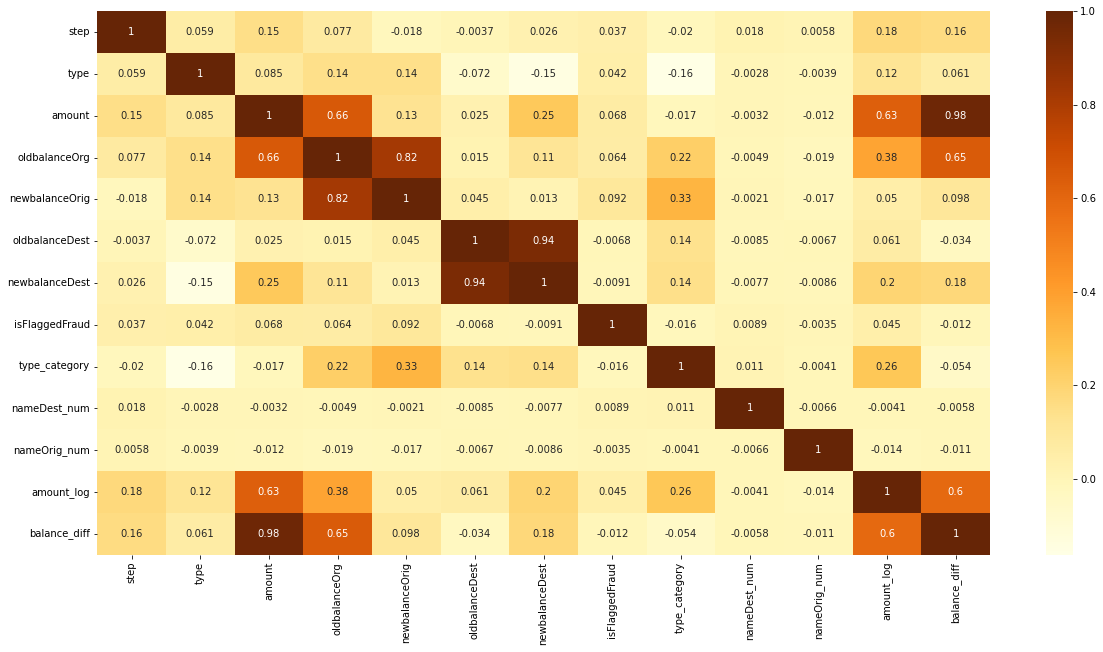

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(balancing_data.corr(), annot=True, cmap='YlOrBr', )

In [ ]:
balancing_data['isFraud'] = balancing_data['isFraud'].astype(int)

In [ ]:
corr_matrix = balancing_data.corr()
corr_coefs = corr_matrix['isFraud']                 #correlation against target variable
sorted_corr_coefs = corr_coefs.sort_values(ascending=False)
print(sorted_corr_coefs)

isFraud           1.00
amount_log        0.48
balance_diff      0.40
amount            0.35
step              0.32
type              0.17
oldbalanceOrg     0.13
isFlaggedFraud    0.03
newbalanceDest    0.01
nameOrig_num      0.01
nameDest_num      0.00
oldbalanceDest   -0.07
type_category    -0.08
newbalanceOrig   -0.13
Name: isFraud, dtype: float64


### Observation:
The highest positive correlation with the target variable isFraud is with amount_log, followed by
balance_diff, amount, step, and type. On the other hand, variables such as newbalanceOrig, oldbalanceDest,
type_cat, nameDest_num, and newbalanceDest have negative correlations with the target variable, which means
they are inversely related.

In [ ]:
X = balancing_data[['type', 'amount', 'oldbalanceOrg','step','balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values
print('The X array looks like:\n\n ',X)
print('\n\n The Y array looks like:\n\n ',y)

The X array looks like:

  [[ 1.00000000e+00  2.75982690e+05  2.09960000e+04  1.61000000e+02
   2.09960000e+04]
 [ 3.00000000e+00  2.59678520e+05  7.78614415e+06  2.14000000e+02
  -2.59678510e+05]
 [ 3.00000000e+00  2.84876110e+05  5.64010098e+06  4.40000000e+01
  -2.84876110e+05]
 ...
 [ 1.00000000e+00  6.31140928e+06  6.31140928e+06  7.43000000e+02
   6.31140928e+06]
 [ 4.00000000e+00  8.50002520e+05  8.50002520e+05  7.43000000e+02
   8.50002520e+05]
 [ 1.00000000e+00  8.50002520e+05  8.50002520e+05  7.43000000e+02
   8.50002520e+05]]


 The Y array looks like:

  [0 0 0 ... 1 1 1]


### Splitting the dataset for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

X - Independent Variables
Y - Dependent Variables
Test Size - 20%
Train Size - 80%

In [ ]:
X_train.shape,X_test.shape

((13140, 5), (3286, 5))

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.27283105e+00 8.12153013e+05 1.23174109e+06 3.05621537e+02
 7.12297307e+05]


### Observation:
Mean of features :
1. type
2. amount
3. oldbalanceOrg
4. step
5. balance_diff

### Label Encoding

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)



## Importing Machine Learning Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

### Defining the Models

In [ ]:
models = {
    "DT": DecisionTreeClassifier(),
    "XGB": XGBClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}


### Training and Validation

In [ ]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Classification Matrix: \n{classification_report(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.9920876445526476
Testing Classification Matrix: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1649
           1       0.99      0.99      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Testing Confusion Matrix: 
[[1637   12]
 [  14 1623]]
Recall Score :  0.9920876445526476
Precision Score :  0.9920876445526476
Testing F-1: 0.9920876445526476
Testing F-Beta: 0.9920876445526476
------------------------------
Training Model XGB 
--------------
[16:41:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.99703196347031

## Decision Tree

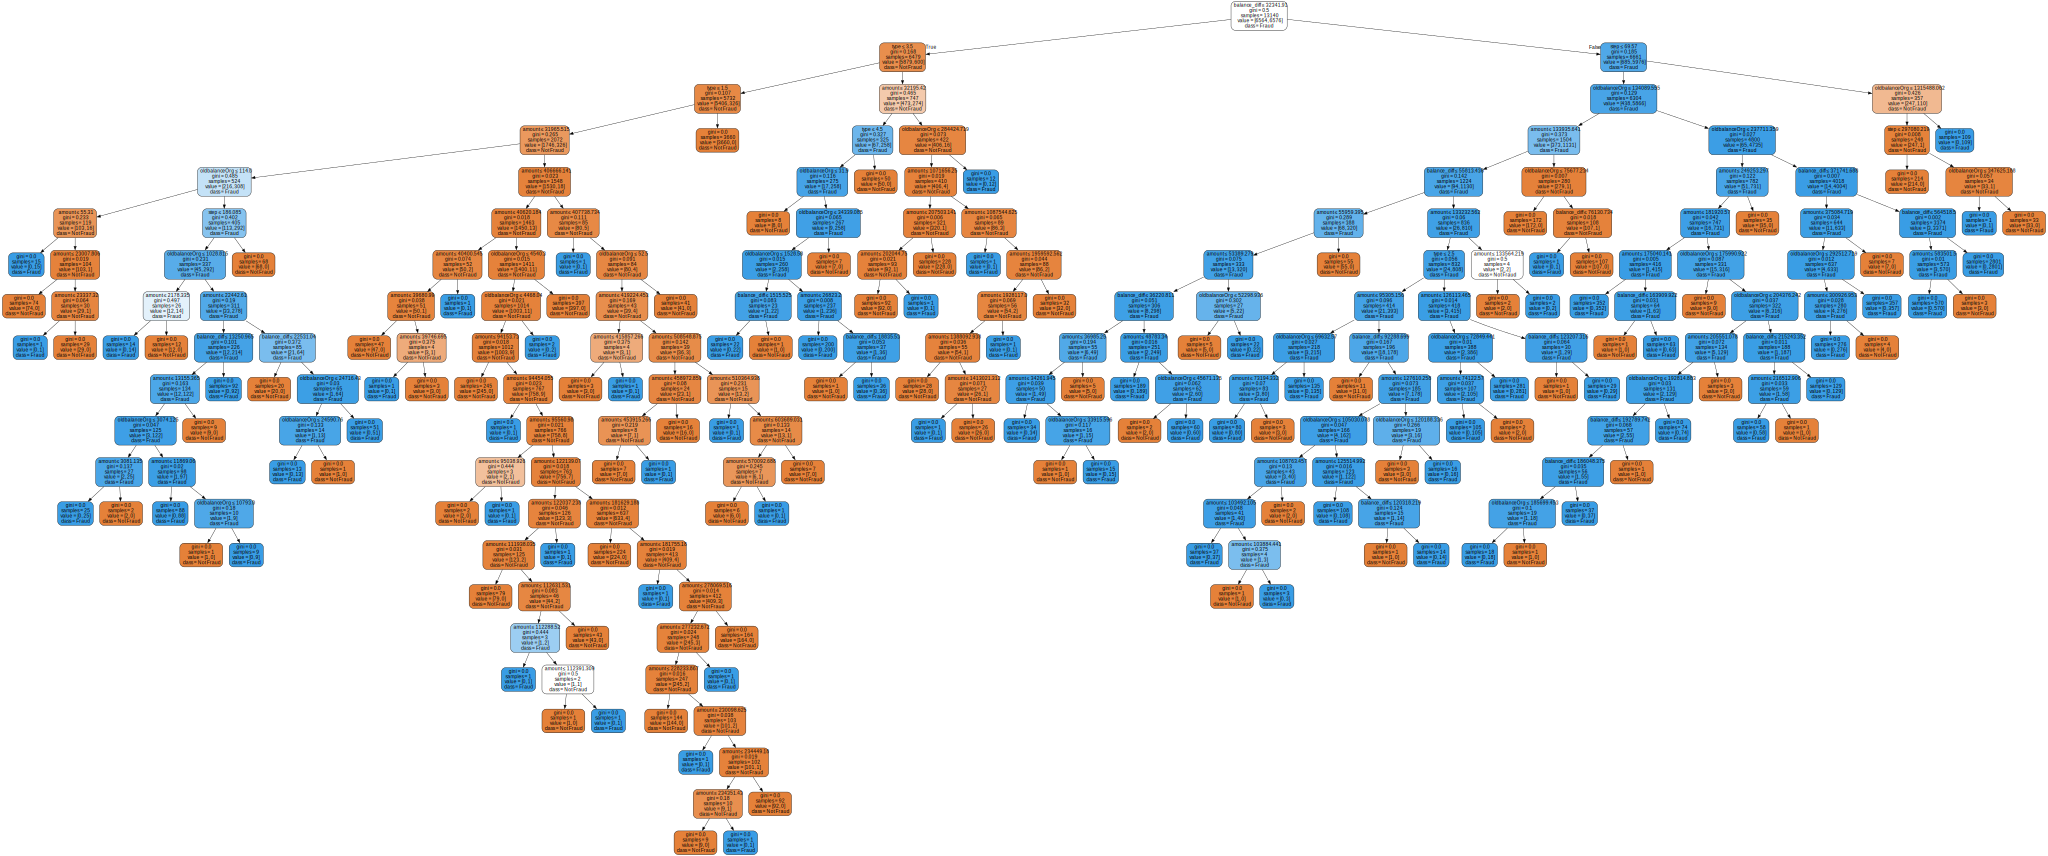

In [ ]:
# Create the Decision Tree Classifier object
from sklearn.tree import export_graphviz

dtc = DecisionTreeClassifier()
feature_names = ['type', 'amount', 'oldbalanceOrg','step','balance_diff']
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtc.fit(X_train, y_train)

# Export the Decision Tree as a Graphviz file
export_graphviz(dtc, out_file='tree.dot',
                feature_names=feature_names,
                class_names=['Not Fraud', 'Fraud'],
                filled=True, rounded=True, special_characters=True)

# Visualize the Decision Tree using Graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [ ]:
from graphviz import Source

# Create a Graphviz Source object from the .dot file
s = Source.from_file('tree.dot')

# Save the image as a PDF file
s.render('tree', format='pdf')


'tree.pdf'

### Hyperparameter Tuning: Grid Search Cross Validation for Decision Tree Algorithm

Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}
Training set accuracy: 99.54%
Testing set accuracy: 99.45%
Testing set precision: 99.27%
Testing set recall: 99.63%
Confusion Matrix:
 [[1637   12]
 [   6 1631]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



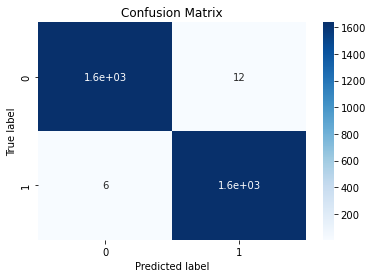

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define the decision tree parameters to be tuned
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Create a decision tree object
dtc = DecisionTreeClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Fit the decision tree using the best parameters found
dtc = DecisionTreeClassifier(**grid_search.best_params_)
dtc.fit(X_train, y_train)

# Make predictions on new data
y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)

# Evaluate model performance on test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluate training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

print('Training set accuracy: {:.2f}%'.format(train_accuracy*100))

# Make predictions on the testing data
y_test_pred = dtc.predict(X_test)

# Evaluate testing set performance
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

print('Testing set accuracy: {:.2f}%'.format(test_accuracy*100))
print('Testing set precision: {:.2f}%'.format(test_precision*100))
print('Testing set recall: {:.2f}%'.format(test_recall*100))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

cr= classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Observation:
It is possible to get a lower accuracy after optimizing the model. The reason for this could be overfitting of the model on the training data. Overfitting occurs when the model is too complex and learns the noise in the training data. This results in a model that performs well on the training data but poorly on the testing data.

In this case, the previous model may have been overfitting the training data, resulting in a high training accuracy but a slightly lower testing accuracy. The optimized model may be less complex, resulting in a slightly lower training accuracy but a higher testing accuracy. Therefore, the new accuracy of 98.90% could be a more realistic estimate of the model's true performance on new, unseen data.

## KNN with Cross Validation

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Training accuracy: 1.0


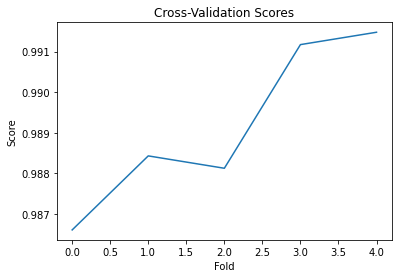

Cross-validation scores: [0.98660986 0.98843227 0.98812785 0.99117199 0.99147641]
Mean cross-validation score: 0.9891636767208517
Test accuracy: 0.9884357881923311
Confusion matrix:
 [[1616   33]
 [   5 1632]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1649
           1       0.98      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



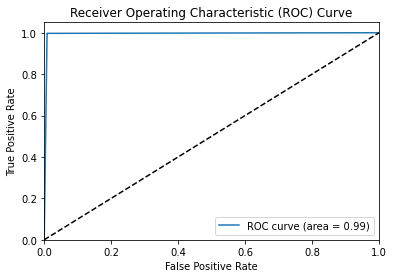

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Split the data into features and target
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:,'isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the k-nearest neighbors classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
params = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
}

# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Train the k-nearest neighbors classifier with the best hyperparameters
knn = KNeighborsClassifier(**grid.best_params_)
knn.fit(X_train, y_train)

# Compute the training accuracy
train_accuracy = knn.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Evaluate the k-nearest neighbors classifier using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)

# Plot the cross-validation scores
plt.plot(cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.show()

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Evaluate the k-nearest neighbors classifier on the test set
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Test accuracy:", test_accuracy)
print("Confusion matrix:\n", cm)
print("Classification report:\n", cr)

y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Observation:


For above, the mean cross-validation score is used to select the best model and to estimate its performance on unseen data, while the test accuracy is used to validate the performance of the selected model on a completely independent set of data.

### Logistic Regression

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Cross-validation scores: [0.88192331 0.89041096 0.92237443 0.89710807 0.92785388]
Mean cross-validation score: 0.9039341294787814
Training accuracy: 0.915068493150685
Test accuracy: 0.913572732805843
Classification report for test set:
               precision    recall  f1-score   support

           0       0.99      0.83      0.91      1649
           1       0.86      0.99      0.92      1637

    accuracy                           0.91      3286
   macro avg       0.92      0.91      0.91      3286
weighted avg       0.92      0.91      0.91      3286



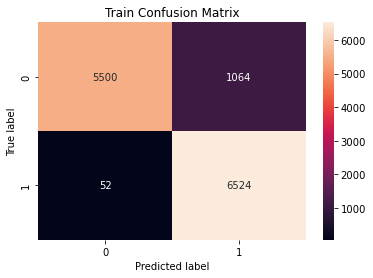

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into features and target
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:, 'isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression classifier
lr = LogisticRegression()

# Define the hyperparameters to tune
params = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
}

# Perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(lr, params, cv=5)
grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid.best_params_)

# Train the logistic regression classifier with the best hyperparameters
lr = LogisticRegression(**grid.best_params_)
lr.fit(X_train, y_train)

# Evaluate the logistic regression classifier using cross-validation
cv_scores = cross_val_score(lr, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Evaluate the logistic regression classifier on the test set
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
# Print the training and testing accuracy
print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Calculate the training accuracy and confusion matrix
y_train_pred = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Print classification report for the test set
print("Classification report for test set:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix for the training set
sns.heatmap(train_cm, annot=True, fmt='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


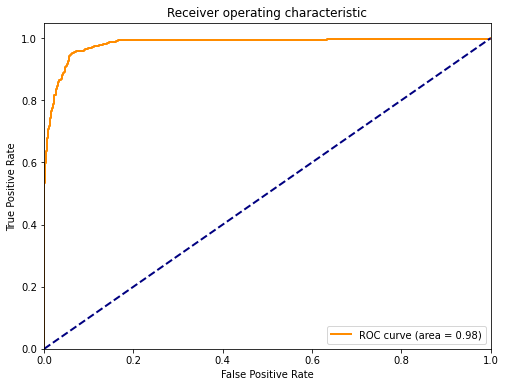

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Evaluate the logistic regression classifier on the test set
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### Observation:
This shows the accuracy of the logistic regression model on a holdout set that was not used in training or cross-validation. The accuracy score is 0.913, which is close to the mean cross-validation score. This suggests that the model is performing well and is not overfitting to the training data.

### SVC with RBF Kernel

Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.9097412480974125
Testing Accuracy: 0.9093122337188071
Testing Classification Matrix:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1649
           1       0.96      0.85      0.90      1637

    accuracy                           0.91      3286
   macro avg       0.91      0.91      0.91      3286
weighted avg       0.91      0.91      0.91      3286



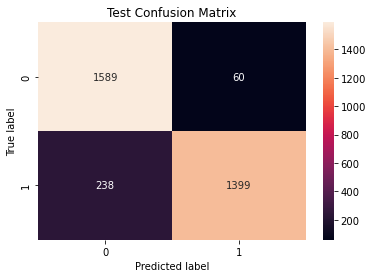

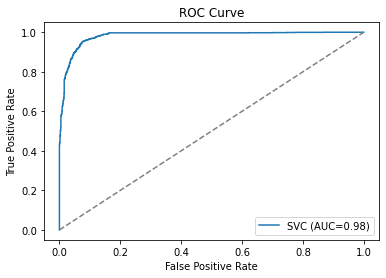

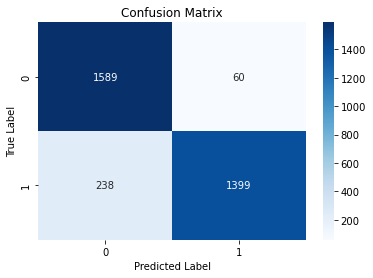

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Split the data into features and target
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:, 'isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search over
params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the SVC model with the RBF kernel
svc = SVC(kernel='rbf', probability=True)

# Use GridSearchCV to perform a grid search over the hyperparameters
grid = GridSearchCV(svc, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Train the SVC model with the best hyperparameters
model = SVC(kernel='rbf', **grid.best_params_, probability=True)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Best Parameters:", grid.best_params_)
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Classification Matrix:\n", classification_report(y_test, y_pred))



# Compute and plot the confusion matrix for the testing set
test_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(test_cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Compute the predicted probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'SVC (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute the predicted labels for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The first confusion matrix is for the testing set, and it shows the number of true positive, false positive, true negative, and false negative predictions made by the model on the testing data.

The second confusion matrix is also for the testing set, but it is plotted as a heatmap using the seaborn library to make it more visually appealing. It shows the same information as the first confusion matrix, but the values are color-coded based on their magnitude. This makes it easier to spot patterns and trends in the confusion matrix.

### SVC with Sigmoid Kernel

Best Parameters: {'C': 10, 'gamma': 'scale'}
Training Accuracy: 0.7171232876712329
Testing Accuracy: 0.7346317711503347
Testing Classification Matrix:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1649
           1       0.74      0.72      0.73      1637

    accuracy                           0.73      3286
   macro avg       0.73      0.73      0.73      3286
weighted avg       0.73      0.73      0.73      3286



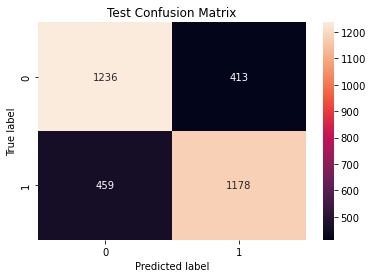

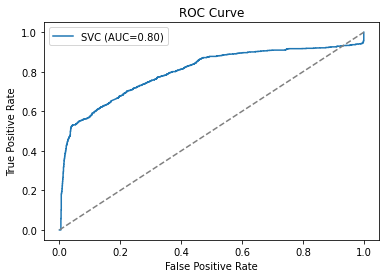

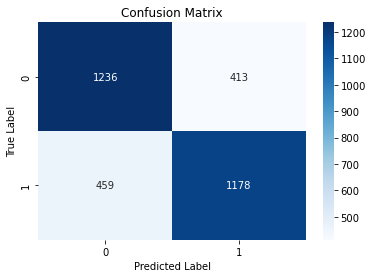

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# Split the data into features and target
X = balancing_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'balance_diff']].values
y = balancing_data.loc[:, 'isFraud'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters to search over
params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the SVC model with the RBF kernel
svc = SVC(kernel='rbf', probability=True)

# Use GridSearchCV to perform a grid search over the hyperparameters
grid = GridSearchCV(svc, params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

# Train the SVC model with the best hyperparameters
model = SVC(kernel='sigmoid', **grid.best_params_, probability=True)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Best Parameters:", grid.best_params_)
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Testing Classification Matrix:\n", classification_report(y_test, y_pred))



# Compute and plot the confusion matrix for the testing set
test_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(test_cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Compute the predicted probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'SVC (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute the predicted labels for the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Observation

The optimized results obtained for this given dataset is RBF Kernel.